In [1]:


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('data.csv')
# print(len(df))
# print(df.columns)

df = df.dropna(subset=['price'])
df['price'] = df['price'].str.replace('PKR', '')
df['price'] = df['price'].str.replace('lacs', '')
df['engine_capacity'] = df['engine_capacity'].str.replace('cc', '')
df['engine_capacity'] = df['engine_capacity'].str.replace('kWh', '')
df['engine_capacity'] = df['engine_capacity'].astype(float)
df['mileage'] = df['mileage'].str.replace(' km', '')
df['mileage'] = df['mileage'].str.replace(',', '')
df['mileage'] = df['mileage'].astype(float)



mask = df['price'].str.contains('crore', case=False)

# Update 'price' column for values containing 'lacs'
lacs_mask = df['price'].str.contains('lacs', case=False, na=False)
df.loc[lacs_mask, 'price'] = (
    df.loc[lacs_mask, 'price']
    .str.extract('([\d.]+)', expand=False)
    .astype(float) * 100000
)

# Update 'price' column for values containing 'crore'
crore_mask = df['price'].str.contains('crore', case=False, na=False)
df.loc[crore_mask, 'price'] = (
    df.loc[crore_mask, 'price']
    .str.extract('([\d.]+)', expand=False)
    .astype(float) * 10000000
)

# Display the updated DataFrame
# print(df)


# df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'] = df['price'].str.replace('crore', '').str.strip()
df['price'] = pd.to_numeric(df['price'], errors='coerce')


q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print(f"The interquartile range (IQR) of the 'price' column is: {iqr}")
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# print("Outliers in the 'price' column:")
# print(outliers['price'])

# print(len(outliers))

med = df['price'].median()
# print(df['price'])

dataset = df.copy()
df.engine_capacity.unique()
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd4 in position 8960: invalid continuation byte

In [120]:

df['price']
# Calculate Quartiles and Interquartile Range (IQR)
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

print(f"The interquartile range (IQR) of the 'price' column is: {iqr}")

# Calculate Lower and Upper Bounds for Outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("Outliers in the 'price' column:")
print(outliers['price'])

print(f"Number of outliers: {len(outliers)}")

# Print Median of the 'price' Column
print(f"Median of the 'price' column: {df['price'].median()}")



The interquartile range (IQR) of the 'price' column is: 22.5
Outliers in the 'price' column:
3        70.00
22       90.75
48       98.00
133      74.00
154      80.00
         ...  
89614    78.80
89670    76.00
89691    73.00
89727    75.00
89848    85.00
Name: price, Length: 3893, dtype: float64
Number of outliers: 3893
Median of the 'price' column: 20.95


In [121]:
print(df)

       Unnamed: 0                                            title  \
0               0  Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007   
1               1                    Suzuki Mehran VX Euro II 2012   
2               2                              Honda Civic EX 1995   
3               3                    Toyota Fortuner 2.7 VVTi 2013   
4               4                    Suzuki Mehran VX Euro II 2015   
...           ...                                              ...   
89951       89951                      Daihatsu Mira G SA III 2018   
89952       89952            Honda Civic Oriel 1.8 i-VTEC CVT 2017   
89953       89953       Toyota Corolla GLi Automatic 1.6 VVTi 2011   
89954       89954                        Suzuki Swift DLX 1.3 2013   
89955       89955                   Toyota Corolla XE Limited 1996   

                                    location  model_year  price   mileage  \
0                        Islamabad Islamabad      2007.0  16.50  100000.0   
1    

In [123]:

# Remove 'CC' from the 'engine_capacity' column
# df['engine_capacity'] = df['engine_capacity'].str.replace('CC', '', case=False)

# Convert 'engine_capacity' column to numeric with error handling
# df['engine_capacity'] = pd.to_numeric(df['engine_capacity'], errors='coerce')

# Calculate Quartiles and Interquartile Range (IQR) for 'engine_capacity'
q1_engine_capacity = df['engine_capacity'].quantile(0.25)
q3_engine_capacity = df['engine_capacity'].quantile(0.75)

# Calculate the interquartile range (IQR) for 'engine_capacity'
iqr_engine_capacity = q3_engine_capacity - q1_engine_capacity

print(f"The interquartile range (IQR) of the 'engine_capacity' column is: {iqr_engine_capacity}")

# Calculate Lower and Upper Bounds for Outliers for 'engine_capacity'
lower_bound_engine_capacity = q1_engine_capacity - 1.5 * iqr_engine_capacity
upper_bound_engine_capacity = q3_engine_capacity + 1.5 * iqr_engine_capacity

# Identify outliers for 'engine_capacity'
outliers_engine_capacity = df[(df['engine_capacity'] < lower_bound_engine_capacity) | (df['engine_capacity'] > upper_bound_engine_capacity)]

print("Outliers in the 'engine_capacity' column:")
print(outliers_engine_capacity['engine_capacity'])

print(f"Number of outliers in 'engine_capacity': {len(outliers_engine_capacity)}")

# Print Median of the 'engine_capacity' Column
print(f"Median of the 'engine_capacity' column: {df['engine_capacity'].median()}")


The interquartile range (IQR) of the 'engine_capacity' column is: 600.0
Outliers in the 'engine_capacity' column:
3        2700.0
14       2800.0
19       3200.0
25       3500.0
27       5700.0
          ...  
89835    4164.0
89848    2800.0
89860    3400.0
89890    3000.0
89894    4600.0
Name: engine_capacity, Length: 6310, dtype: float64
Number of outliers in 'engine_capacity': 6310
Median of the 'engine_capacity' column: 1300.0


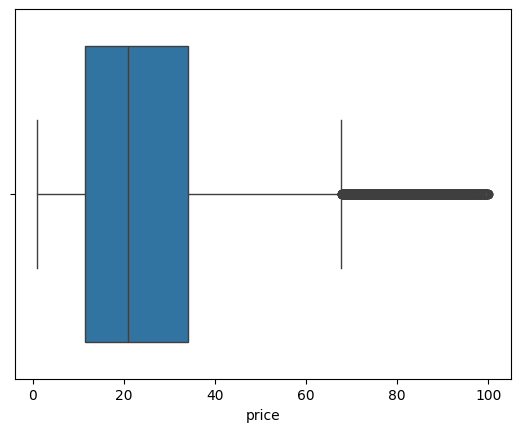

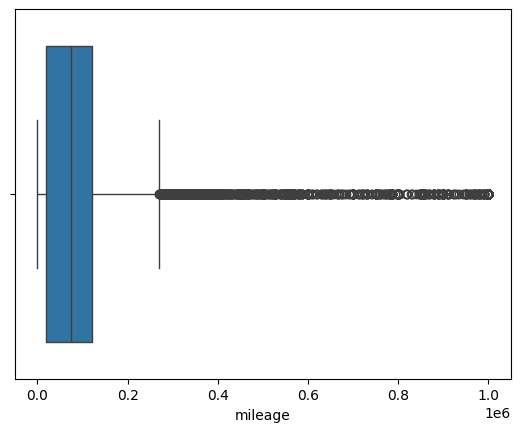

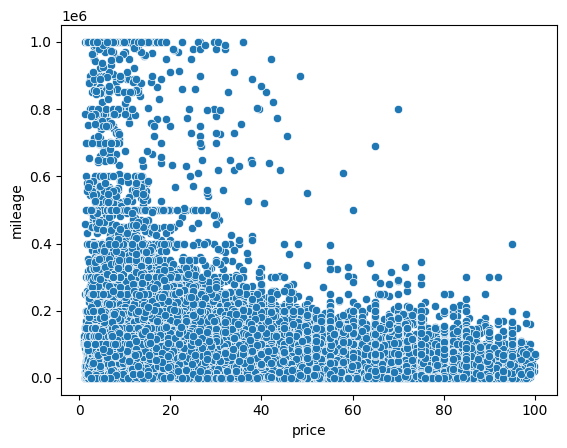

In [124]:

# Boxplot for 'price'
sns.boxplot(data=df, x='price')
plt.show()

# Boxplot for 'mileage'
sns.boxplot(data=df, x='mileage')
plt.show()

# Scatter plot for 'price' vs 'mileage'
sns.scatterplot(data=df, x='price', y='mileage')
plt.show()


In [125]:
df

,Unnamed: 0,title,location,model_year,price,mileage,engine_type,transmission,registered_in,color,assembly,engine_capacity,body_type,car_features,description
0,0,Honda Civic VTi Oriel Prosmatec 1.8 i-VTEC 2007,Islamabad Islamabad,2007.0,16.50,100000.0,Petrol,Automatic,Lahore,Grey,Imported Cars,1800.0,Sedan,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,2007 model full option Chat piller geniune or ...
1,1,Suzuki Mehran VX Euro II 2012,"Eden Gardens, Faisalabad Punjab",2012.0,7.00,100000.0,Petrol,Manual,Faisalabad,Grey,Imported Cars,800.0,Hatchback,AM/FM Radio\nCD Player\nImmobilizer Key,"Very smooth drive,70% in orignal paint rest of..."
2,2,Honda Civic EX 1995,"Bostan Road, Rawalpindi Punjab",1995.0,7.60,999.0,Petrol,Manual,Lahore,Black,Imported Cars,1500.0,Sedan,AM/FM Radio\nAir Conditioning\nAlloy Rims\nCas...,1600cc Engine installed Alloy RimsAir Conditio...
3,3,Toyota Fortuner 2.7 VVTi 2013,"Kallar Kahar Road, Chakwal Punjab",2013.0,70.00,94000.0,Petrol,Automatic,Lahore,Black,Imported Cars,2700.0,SUV,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,Inside out fully original. Original return fil...
4,4,Suzuki Mehran VX Euro II 2015,Muzaffar Gargh Punjab,2015.0,8.00,86000.0,Petrol,Manual,Multan,Grey,Imported Cars,796.0,Hatchback,AM/FM Radio\nCD Player\nImmobilizer Key,gari total genion hy.chill a.c.new tires.no wo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89951,89951,Daihatsu Mira G SA III 2018,"Gulshan-e-Iqbal, Karachi Sindh",2018.0,30.00,65000.0,Petrol,Automatic,Sindh,White,Imported,660.0,Hatchback,ABS\nAir Bags\nAir Conditioning\nAlloy Rims\nI...,100% original. Alloy Rims. Authorized dealersh...
89952,89952,Honda Civic Oriel 1.8 i-VTEC CVT 2017,"Tandlianwala Town, Faisalabad Punjab",2017.0,37.50,114000.0,Petrol,Automatic,Islamabad,Silver,Imported Cars,1800.0,Sedan,ABS\nAM/FM Radio\nAir Bags\nAir Conditioning\n...,only call\nMention PakWheels.com when calling ...
89953,89953,Toyota Corolla GLi Automatic 1.6 VVTi 2011,Lahore Punjab,2011.0,22.35,152000.0,Petrol,Automatic,Lahore,Silver,Imported Cars,1600.0,Sedan,ABS\nAM/FM Radio\nAir Conditioning\nCD Player\...,After Market Alloy rims. All original document...
89954,89954,Suzuki Swift DLX 1.3 2013,"Gulshan-e-Iqbal, Karachi Sindh",2013.0,15.50,104000.0,Petrol,Manual,Karachi,Silver,Imported Cars,1300.0,Hatchback,ABS\nAM/FM Radio\nAir Conditioning\nAlloy Rims...,sides shower chat diggi bonet original car on ...


In [126]:
dataset.drop(['title', 'location', 'registered_in', 'car_features', 'description','Unnamed: 0'], axis=1, inplace=True)

dataset.dropna(inplace=True)
dataset.isnull().sum()
dataset

,model_year,price,mileage,engine_type,transmission,color,assembly,engine_capacity,body_type
0,2007.0,16.50,100000.0,Petrol,Automatic,Grey,Imported Cars,1800.0,Sedan
1,2012.0,7.00,100000.0,Petrol,Manual,Grey,Imported Cars,800.0,Hatchback
2,1995.0,7.60,999.0,Petrol,Manual,Black,Imported Cars,1500.0,Sedan
3,2013.0,70.00,94000.0,Petrol,Automatic,Black,Imported Cars,2700.0,SUV
4,2015.0,8.00,86000.0,Petrol,Manual,Grey,Imported Cars,796.0,Hatchback
...,...,...,...,...,...,...,...,...,...
89951,2018.0,30.00,65000.0,Petrol,Automatic,White,Imported,660.0,Hatchback
89952,2017.0,37.50,114000.0,Petrol,Automatic,Silver,Imported Cars,1800.0,Sedan
89953,2011.0,22.35,152000.0,Petrol,Automatic,Silver,Imported Cars,1600.0,Sedan
89954,2013.0,15.50,104000.0,Petrol,Manual,Silver,Imported Cars,1300.0,Hatchback


In [127]:
dataset.drop(['assembly'], inplace=True, axis=1)
dataset

,model_year,price,mileage,engine_type,transmission,color,engine_capacity,body_type
0,2007.0,16.50,100000.0,Petrol,Automatic,Grey,1800.0,Sedan
1,2012.0,7.00,100000.0,Petrol,Manual,Grey,800.0,Hatchback
2,1995.0,7.60,999.0,Petrol,Manual,Black,1500.0,Sedan
3,2013.0,70.00,94000.0,Petrol,Automatic,Black,2700.0,SUV
4,2015.0,8.00,86000.0,Petrol,Manual,Grey,796.0,Hatchback
...,...,...,...,...,...,...,...,...
89951,2018.0,30.00,65000.0,Petrol,Automatic,White,660.0,Hatchback
89952,2017.0,37.50,114000.0,Petrol,Automatic,Silver,1800.0,Sedan
89953,2011.0,22.35,152000.0,Petrol,Automatic,Silver,1600.0,Sedan
89954,2013.0,15.50,104000.0,Petrol,Manual,Silver,1300.0,Hatchback


In [128]:
from sklearn.preprocessing import LabelEncoder


dft = dataset.copy()
label_cat = LabelEncoder()
dft['engine_type'] = label_cat.fit_transform(dft['engine_type'])
dft['transmission'] = label_cat.fit_transform(dft['transmission'])
dft['color'] = label_cat.fit_transform(dft['color'])
dft['body_type'] = label_cat.fit_transform(dft['body_type'])

dft

,model_year,price,mileage,engine_type,transmission,color,engine_capacity,body_type
0,2007.0,16.50,100000.0,2,0,8,1800.0,15
1,2012.0,7.00,100000.0,2,1,8,800.0,6
2,1995.0,7.60,999.0,2,1,1,1500.0,15
3,2013.0,70.00,94000.0,2,0,1,2700.0,14
4,2015.0,8.00,86000.0,2,1,8,796.0,6
...,...,...,...,...,...,...,...,...
89951,2018.0,30.00,65000.0,2,0,20,660.0,6
89952,2017.0,37.50,114000.0,2,0,17,1800.0,15
89953,2011.0,22.35,152000.0,2,0,17,1600.0,15
89954,2013.0,15.50,104000.0,2,1,17,1300.0,6


In [129]:
y = dft['price'].values
x = dft.drop(['price'],axis=1).values
x, y

(array([[2.00700e+03, 1.00000e+05, 2.00000e+00, ..., 8.00000e+00,
         1.80000e+03, 1.50000e+01],
        [2.01200e+03, 1.00000e+05, 2.00000e+00, ..., 8.00000e+00,
         8.00000e+02, 6.00000e+00],
        [1.99500e+03, 9.99000e+02, 2.00000e+00, ..., 1.00000e+00,
         1.50000e+03, 1.50000e+01],
        ...,
        [2.01100e+03, 1.52000e+05, 2.00000e+00, ..., 1.70000e+01,
         1.60000e+03, 1.50000e+01],
        [2.01300e+03, 1.04000e+05, 2.00000e+00, ..., 1.70000e+01,
         1.30000e+03, 6.00000e+00],
        [1.99600e+03, 2.58456e+05, 2.00000e+00, ..., 1.70000e+01,
         1.30000e+03, 1.50000e+01]]),
 array([16.5 ,  7.  ,  7.6 , ..., 22.35, 15.5 ,  7.3 ]))

In [148]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score

In [149]:
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42, test_size=0.3)

In [155]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predict = linear.predict(x_test)
print("Score: ", linear.score(x_test, y_test))



Score:  0.7552892081951069


In [156]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error, explained_variance_score
import numpy as np

# Assuming 'predict' contains the predicted values and 'y_test' contains the true values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predict)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predict)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R-squared (R²) score
r_squared = r2_score(y_test, predict)

# Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(y_test, predict)

# Median Absolute Error (MedAE)
medae = median_absolute_error(y_test, predict)

# Explained Variance Score
explained_variance = explained_variance_score(y_test, predict)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) score:", r_squared)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Explained Variance Score:", explained_variance)


Mean Absolute Error (MAE): 6.256620582242344
Mean Squared Error (MSE): 84.04269801295388
Root Mean Squared Error (RMSE): 9.167480461552884
R-squared (R²) score: 0.7552892081951069
Mean Absolute Percentage Error (MAPE): 0.3677989774231698
Median Absolute Error (MedAE): 4.35767653684079
Explained Variance Score: 0.7553193487913685
